# 4. 로지스틱 회귀(Logistic Regression) - 이진 분류

## 1) 이진 분류(Binary Classification)
- Example
    - 학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정

|score($x$)|result($y)|
|---|---|
|45|불합격|
|50|불합격|
|55|불합격|
|60|합격|
|65|합격|
|70|합격|

    - 위의 데이터에서 합격:1, 불합격:0으로 했을 때 그래프
<img src=로지스틱회귀.png width=300>

위의 그래프는 S자 형태로 표현되는데 이러한 $x$와 $y$의 관계를 표현하려면 S자 형태로 표현할 수 있는 함수가 필요 $\Longrightarrow$ **시그모이드 함수**

## 2) 시그모이드 함수(Sigmoid function)
sigmoid($Wx+b$) = $\frac{1}{1+e^{-(Wx+b)}}$
- 여기서 구해야할 것은 여전히 주어진 데이터에 가장 적합한 $W$와 $b$다.
<img src=시그모이드그래프.png width=300>

In [2]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

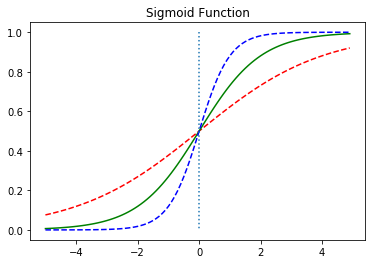

In [3]:
# W의 값이 변할 떄 sigmoid 함수 변화
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

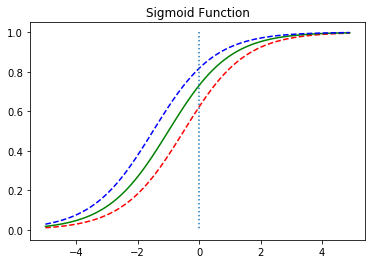

In [4]:
# b가 편할 때마다 sigmoid함수 변화
def sigmoid2(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## 3) 비용 함수(Cost function)
- 로지스틱 회귀 또한 경사하강법을 이용해 가중치 $W$를 찾아내지만 비용함수로는 MSE를 사용하지 않음 $\Longrightarrow$ 시그모이드 함수의 비용함수를 MSE로 하여 그리면 다음처럼 나옴
<img src=로컬미니멈.png width=300>
- 잘못하면 local min에 빠지기 때문에 새로운 cost함수를 찾아야 함

### 목적함수(objective function)
$J(W) = \frac{1}{n} \sum_{i=1}^{n} f\left(H(x^{(i)}), y^{(i)})\right)$
- 여기서 새로운 함수 $f$도 어떻게 정의하느냐에 따라서 가중치를 최소화하는 적절한 목적 함수가 완성됌
- sigmoid함수는 
    - 실제값이 0일때 $y$값이 1에 가까워지면 오차가 커짐        
    - 실제값이 1일때 $y$값이 0에 가까워지면 오차가 커짐  
    $\Longrightarrow$ log 함수로 표현 가능
        - cost($H(x), y$) = $-log(H(x))$ if $y$ = 1
        - cost($H(x), y$) = $-log(1-H(x))$ if $y$ = 0
        
<img src=손실함수.png width=300>

- 파란색 --> 실제값이 1일때의 cost($H(x), y$) = $-log( H(x))$  
- 빨간색 --> 실제값이 0일때 cost($H(x), y$) = $-log(1-H(x))$  
$\Longrightarrow$ cost($H(x), y$) = $[ylog(H(x))+(1-y)log(1-H(x))]$  

### ※ 로지스틱 회귀의 목적함수  
$J(W) = -\frac{1}{n}\sum_{i=1}^n[y^{(i)}log(H(x^{(i)}))+(1-y^{(i)})log(1-H(x^{(i)}))]$

## 4) 케라스로 구현하는 로지스틱 회귀

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13 samples
Epoch 1/200
13/13 [==============================] - 0s 6ms/sample - loss: 11.9544 - binary_accuracy: 0.3846
Epoch 2/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.2139 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 844us/sample - loss: 0.2025 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 855us/sample - loss: 0.1988 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 906us/sample - loss: 0.1966 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 785us/sample - loss: 0.1947 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 799us/sample - loss: 0.1931 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [===================

13/13 [==============================] - 0s 879us/sample - loss: 0.1326 - binary_accuracy: 0.9231
Epoch 69/200
13/13 [==============================] - 0s 690us/sample - loss: 0.1320 - binary_accuracy: 0.9231
Epoch 70/200
13/13 [==============================] - 0s 764us/sample - loss: 0.1314 - binary_accuracy: 0.9231
Epoch 71/200
13/13 [==============================] - 0s 999us/sample - loss: 0.1308 - binary_accuracy: 0.9231
Epoch 72/200
13/13 [==============================] - 0s 723us/sample - loss: 0.1302 - binary_accuracy: 0.9231
Epoch 73/200
13/13 [==============================] - 0s 766us/sample - loss: 0.1296 - binary_accuracy: 0.9231
Epoch 74/200
13/13 [==============================] - 0s 922us/sample - loss: 0.1290 - binary_accuracy: 0.9231
Epoch 75/200
13/13 [==============================] - 0s 755us/sample - loss: 0.1285 - binary_accuracy: 0.9231
Epoch 76/200
13/13 [==============================] - 0s 691us/sample - loss: 0.1279 - binary_accuracy: 0.9231
Epoch 77/200
1

13/13 [==============================] - 0s 767us/sample - loss: 0.1017 - binary_accuracy: 0.9231
Epoch 142/200
13/13 [==============================] - 0s 622us/sample - loss: 0.1014 - binary_accuracy: 0.9231
Epoch 143/200
13/13 [==============================] - 0s 767us/sample - loss: 0.1011 - binary_accuracy: 0.9231
Epoch 144/200
13/13 [==============================] - 0s 997us/sample - loss: 0.1008 - binary_accuracy: 0.9231
Epoch 145/200
13/13 [==============================] - 0s 700us/sample - loss: 0.1005 - binary_accuracy: 0.9231
Epoch 146/200
13/13 [==============================] - 0s 921us/sample - loss: 0.1002 - binary_accuracy: 0.9231
Epoch 147/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.1000 - binary_accuracy: 0.9231
Epoch 148/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0997 - binary_accuracy: 0.9231
Epoch 149/200
13/13 [==============================] - 0s 1ms/sample - loss: 0.0994 - binary_accuracy: 0.9231
Epoch 150/20

- X : 임의의 숫자 나열
- $y$ : 레이블 데이터(숫자 10이상의 경우에는 1, 미만인 경우에는 0을 부여)
- 단순 선형회귀 때와 마찬가지로 한 개의 X로부터 1개의 $y$를 예측하는 관계이기 때문에, dense layer에서 각각 1을 기재
- 시그모이드 함수 사용할거라 activation='sigmoid'를 써줌
- optimzer는 경사 하강법의 일종인 확률적 경사하강법(Stochastic Gradient Descent)를 사용, loss함수는 크로스 엔트로피를 사용(이진 분류에서는 크로스 엔트로피 함수 사용할 때 binary_crossentropy 기재)
- 총 200회에 걸쳐서 오차 최소화 하는 $W$와 $b$를 찾아내는 작업

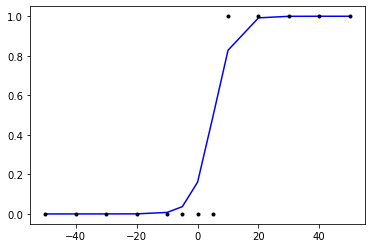

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

$X$ 값이 5와 10사이의 어떤 값일때 y값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 $X$값이 5일때는 y값이 0.5보다 작고, $X$값이 10일 때는 y값이 0.5를 넘을 것입니다. 이제 $X$값이 5보다 작은 값일 때와 $X$값이 10보다 클 때에 대해서 y값을 출력해봅시다.

In [3]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.20935172]
 [0.2676547 ]
 [0.33530858]
 [0.4104782 ]
 [0.44995624]]
[[0.86920995]
 [0.99404067]
 [0.99976116]
 [0.99999046]
 [1.        ]]


$X$값이 5보다 작을 때는 0.5보다 작은 값을, $X$값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다.